In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6
import warnings
warnings.filterwarnings('ignore')

In [31]:
#Loading data from Excel.
filepath = 'E:\\IPBA\BYOP\Test_dataset.xlsx'
xlSheet = 'Sheet1'
dataset = pd.read_excel(io=filepath, sheet_name = xlSheet)
dataset.head(10)
print(dataset)

        Invoice  Product_Code  Quantity  InvoiceDate   InvoiceDate_timeStamp  \
0         89058       7259395         3   2019-04-20 2019-04-20 06:02:02.338   
1         89058         10557         5   2019-04-20 2019-04-20 06:02:02.338   
2         89058       2733507         3   2019-04-20 2019-04-20 06:02:02.338   
3         89058       5200349         5   2019-04-20 2019-04-20 06:02:02.338   
4         89058        715497         3   2019-04-20 2019-04-20 06:02:02.338   
...         ...           ...       ...          ...                     ...   
802995    63494         46327         3  2022-12-04  2022-12-04 11:13:23.419   
802996    63494        669238         3  2022-12-04  2022-12-04 11:13:23.419   
802997    63494        325029         4  2022-12-04  2022-12-04 11:13:23.419   
802998    63494         13579         5  2022-12-04  2022-12-04 11:13:23.419   
802999    63494        669238         5  2022-12-04  2022-12-04 11:13:23.419   

        Price  Customer_ID Country  Pac

In [26]:
#ds = dataset[['InvoiceDate', 'Quantity', 'Price']]
#ds['SalesAmount'] = ds['Price'] * ds['Quantity']
#ds.head(10)
#print(ds)

        InvoiceDate  Quantity  Price  SalesAmount
0        2019-04-20         3     62          186
1        2019-04-20         5     37          185
2        2019-04-20         3     48          144
3        2019-04-20         5    100          500
4        2019-04-20         3     91          273
...             ...       ...    ...          ...
802995  2022-12-04          3      7           21
802996  2022-12-04          3     27           81
802997  2022-12-04          4     33          132
802998  2022-12-04          5     50          250
802999  2022-12-04          5     27          135

[803000 rows x 4 columns]


In [34]:
print(dataset.columns.tolist())

['Invoice', 'Product_Code', 'Quantity', 'InvoiceDate', 'InvoiceDate_timeStamp', 'Price', 'Customer_ID', 'Country', 'Pack_Size_Code', 'In_Store_Promotion_Flag', 'Online_Promotion_Flag', 'Shelf_Space_Code', 'Year', 'Month', 'Day', 'Week', 'Sales Amount']


In [60]:
ds = dataset[['InvoiceDate', 'Sales Amount']]
ds.head(10)
print(ds)

        InvoiceDate  Sales Amount
0        2019-04-20           186
1        2019-04-20           185
2        2019-04-20           144
3        2019-04-20           500
4        2019-04-20           273
...             ...           ...
802995  2022-12-04             21
802996  2022-12-04             81
802997  2022-12-04            132
802998  2022-12-04            250
802999  2022-12-04            135

[803000 rows x 2 columns]


In [61]:
ds = ds[['InvoiceDate','Sales Amount']]
ds = ds.groupby('InvoiceDate')[['Sales Amount']].sum()
ds.reset_index(inplace=True)
print(ds)

      InvoiceDate  Sales Amount
0      2019-04-20         23330
1      2019-04-21         96254
2      2019-04-22         73025
3      2019-04-23         89384
4      2019-04-24         49600
...           ...           ...
1320  2022-11-30         230929
1321  2022-12-01         175264
1322  2022-12-02         304611
1323  2022-12-03         195378
1324  2022-12-04         280438

[1325 rows x 2 columns]


In [62]:
ds['InvoiceDate'] = pd.to_datetime(ds['InvoiceDate'], infer_datetime_format = True)
indexedDataset = ds.set_index(['InvoiceDate'])

In [63]:
from datetime import datetime
indexedDataset.head(5)

,Sales Amount
InvoiceDate,
2019-04-20,23330
2019-04-21,96254
2019-04-22,73025
2019-04-23,89384
2019-04-24,49600


In [64]:
indexedDataset.shape
indexedDataset.info()
indexedDataset.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1325 entries, 2019-04-20 to 2022-12-04
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Sales Amount  1325 non-null   int64
dtypes: int64(1)
memory usage: 20.7 KB


,count,mean,std,min,25%,50%,75%,max
Sales Amount,1325.0,110726.09434,48553.525663,18752.0,74976.0,103256.0,138337.0,349397.0


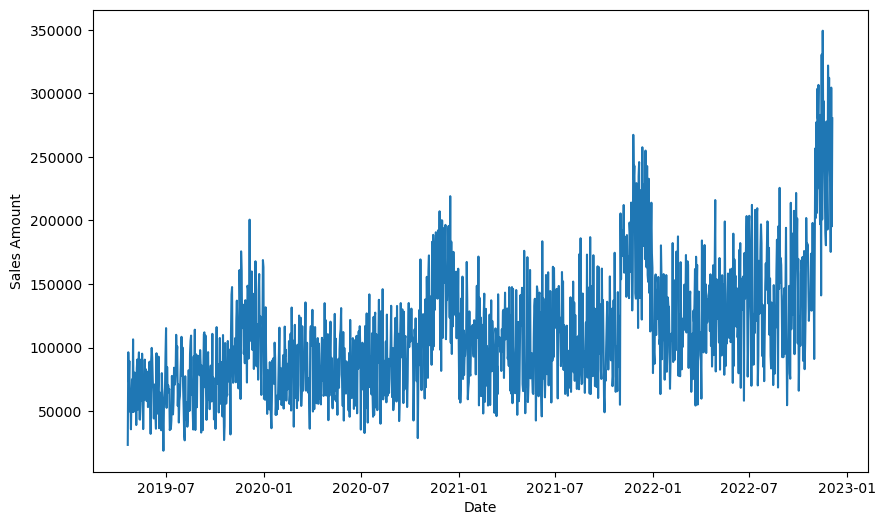

In [66]:
#Plot Graph
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.plot(indexedDataset)

In [70]:
#Determining rolling statistics
rolmean = indexedDataset.rolling(window=365).mean()
rolstd = indexedDataset.rolling(window=365).std()
print(rolmean,rolstd)

              Sales Amount
InvoiceDate               
2019-04-20             NaN
2019-04-21             NaN
2019-04-22             NaN
2019-04-23             NaN
2019-04-24             NaN
...                    ...
2022-11-30   145925.556164
2022-12-01   145777.235616
2022-12-02   146089.068493
2022-12-03   146082.320548
2022-12-04   146534.608219

[1325 rows x 1 columns]              Sales Amount
InvoiceDate              
2019-04-20            NaN
2019-04-21            NaN
2019-04-22            NaN
2019-04-23            NaN
2019-04-24            NaN
...                   ...
2022-11-30   52428.077743
2022-12-01   52267.606508
2022-12-02   52872.927761
2022-12-03   52866.461514
2022-12-04   53307.178806

[1325 rows x 1 columns]


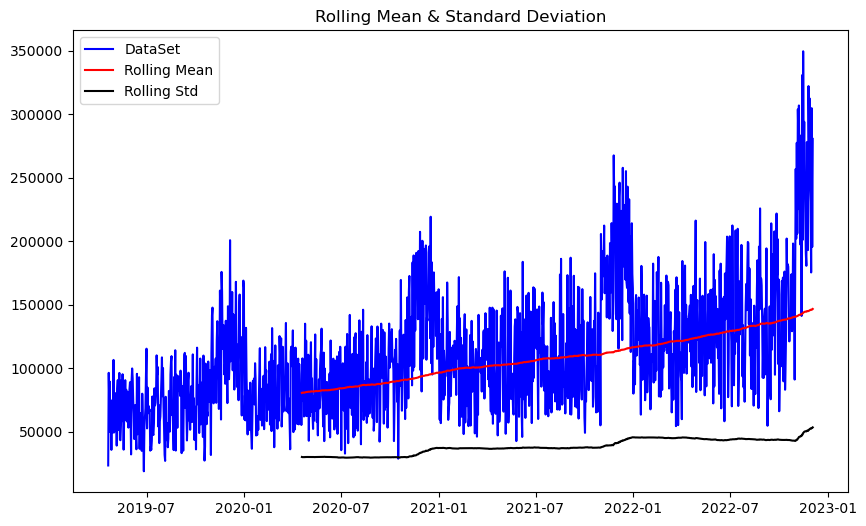

In [72]:
# plot rolling statistics:
orig = plt.plot(indexedDataset, color='blue',label='DataSet')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [86]:
# Performing Dickey - Fuller Test
from statsmodels.tsa.stattools import adfuller 

print('Results of Dickey Fuller Test')
dftest = adfuller(indexedDataset['Sales Amount'], autolag='AIC')

# AIC- Akaike information criterion what we looking for in Time Series Exact value or Actual Value
"""
The Akaike information criterion (AIC) is a mathematical method for evaluating how well a model fits the data 
it was generated from. In statistics, AIC is used to compare different possible models 
and determine which one is the best fit for the data
"""
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','P-Value','#Lags Used','No. Of Observations Used'])

print(dfoutput)   

print('\nCritical Values: ')
for key, val in dftest[4].items():
    print(key,':',val)
    if dftest[0] < val:
        print('Null Hypothesis Rejected. Time Series is Stationary')
    else:
        print('Null Hypothesis Accepted. Time Series is not Stationary')
    
 #Rules:-
"""
In Null Hypothesis 
1. "P-Value" should always be = 0.5
2. Critical Values
"""

Results of Dickey Fuller Test
Test Statistic                -1.787183
P-Value                        0.386843
#Lags Used                    11.000000
No. Of Observations Used    1313.000000
dtype: float64

Critical Values: 
1% : -3.435340198430096
Null Hypothesis Accepted. Time Series is not Stationary
5% : -2.863743768394356
Null Hypothesis Accepted. Time Series is not Stationary
10% : -2.567943297315671
Null Hypothesis Accepted. Time Series is not Stationary


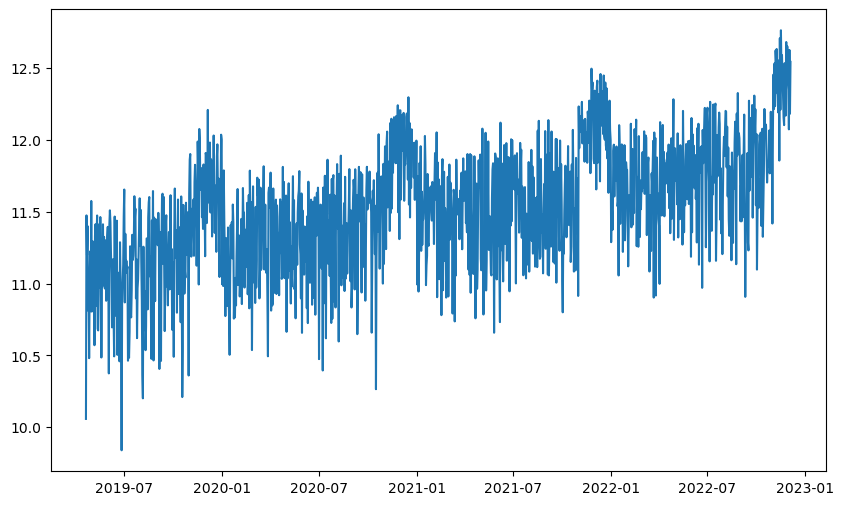

In [87]:
#Estimating Trend
indexedDataset_logscale = np.log(indexedDataset)
plt.plot(indexedDataset_logscale)

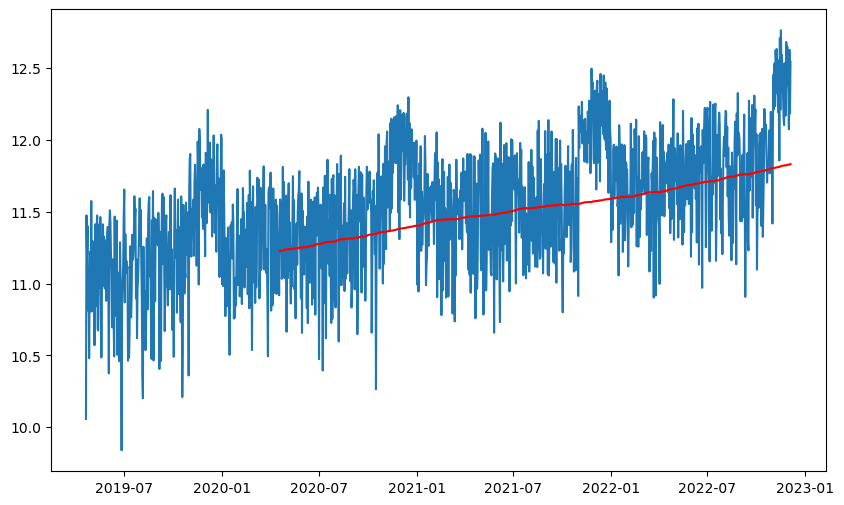

In [88]:
# Calculating moving average
movingAverage = indexedDataset_logscale.rolling(window=365).mean()
movingSTD = indexedDataset_logscale.rolling(window=365).std()
plt.plot(indexedDataset_logscale)
plt.plot(movingAverage, color = 'red')
# with below grap we can conclude that mean is not stationary. moving with the time

In [89]:
# Difference between Moving average and actual sales amount
datasetLogScaleMinusMovingAverage =  indexedDataset_logscale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

,Sales Amount
InvoiceDate,
2019-04-20,NaN
2019-04-21,NaN
2019-04-22,NaN
2019-04-23,NaN
2019-04-24,NaN
2019-04-25,NaN
2019-04-26,NaN
2019-04-27,NaN
2019-04-28,NaN


In [90]:
#Removing NaN values from datasetLogScaleMinusMovingAverage
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Sales Amount
InvoiceDate,
2020-04-18,0.240000
2020-04-19,0.357752
2020-04-20,-0.015730
2020-04-21,0.339270
2020-04-22,-0.195050
2020-04-23,-0.165311
2020-04-24,0.581559
2020-04-25,-0.186056
2020-04-26,0.473832


In [92]:
from statsmodels.tsa.stattools import adfuller
def  test_stationarity(timeseries):
    
    #Determing rolling statistics
    movingAverage = timeseries.rolling(window=365).mean()
    movingSTD = timeseries.rolling(window=365).std()
    
    #Plot Rolling Statistics
    orig = plt.plot(timeseries, color='blue',label='DataSet')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Performing Dickey - Fuller Test
    print('Results of Dickey Fuller Test')
    dftest = adfuller(indexedDataset['Sales Amount'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','P-Value','#Lags Used','No. Of Observations Used'])
    print(dfoutput)     
    print('\nCritical Values: ')
    for key, val in dftest[4].items():
        print(key,':',val)
        if dftest[0] < val:
            print('Null Hypothesis Rejected. Time Series is Stationary')
        else:
            print('Null Hypothesis Accepted. Time Series is not Stationary')
    

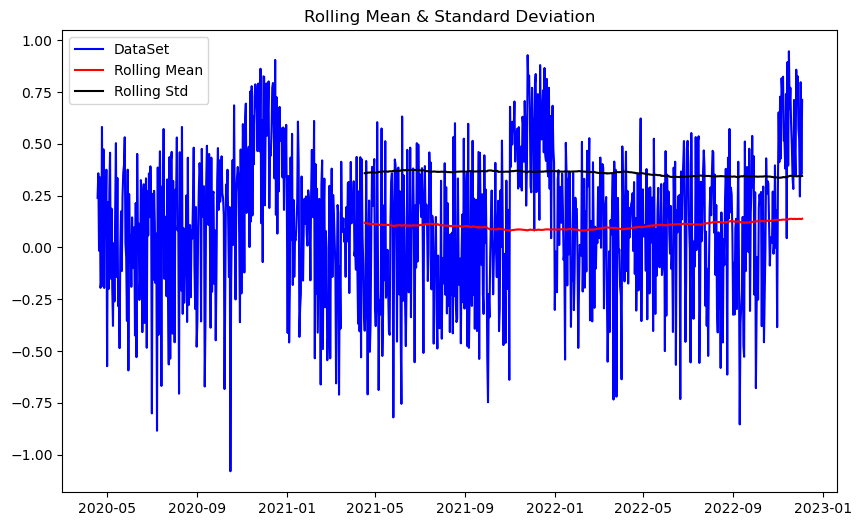

Results of Dickey Fuller Test
Test Statistic                -1.787183
P-Value                        0.386843
#Lags Used                    11.000000
No. Of Observations Used    1313.000000
dtype: float64

Critical Values: 
1% : -3.435340198430096
Null Hypothesis Accepted. Time Series is not Stationary
5% : -2.863743768394356
Null Hypothesis Accepted. Time Series is not Stationary
10% : -2.567943297315671
Null Hypothesis Accepted. Time Series is not Stationary


In [93]:
test_stationarity(datasetLogScaleMinusMovingAverage)

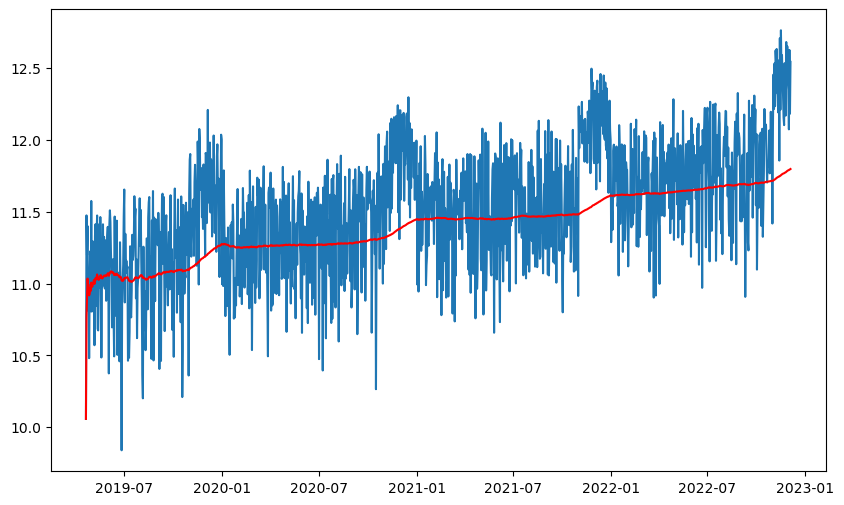

In [98]:
exponentialDecayWeightedAverage = indexedDataset_logscale.ewm(halflife=182, min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logscale)
plt.plot(exponentialDecayWeightedAverage, color='red')

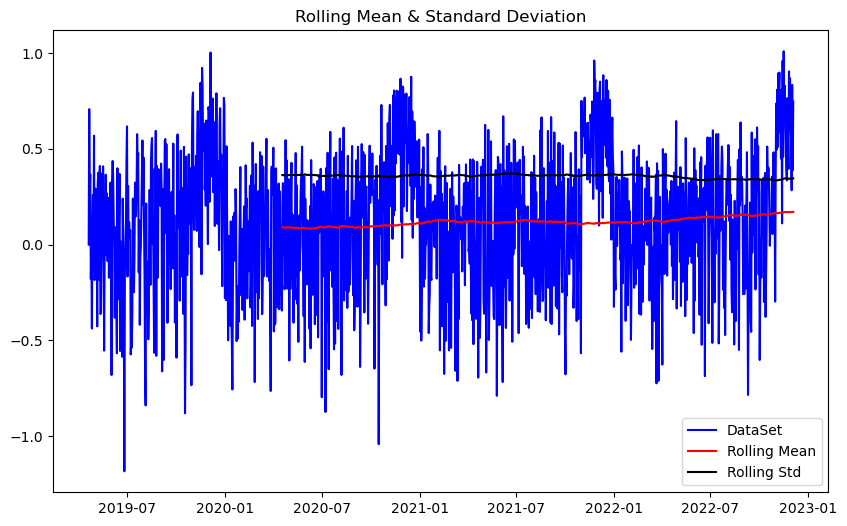

Results of Dickey Fuller Test
Test Statistic                -1.787183
P-Value                        0.386843
#Lags Used                    11.000000
No. Of Observations Used    1313.000000
dtype: float64

Critical Values: 
1% : -3.435340198430096
Null Hypothesis Accepted. Time Series is not Stationary
5% : -2.863743768394356
Null Hypothesis Accepted. Time Series is not Stationary
10% : -2.567943297315671
Null Hypothesis Accepted. Time Series is not Stationary


In [99]:
datasetLogScaleMinusMovingExponentialDecayWeightedAverage = indexedDataset_logscale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayWeightedAverage)

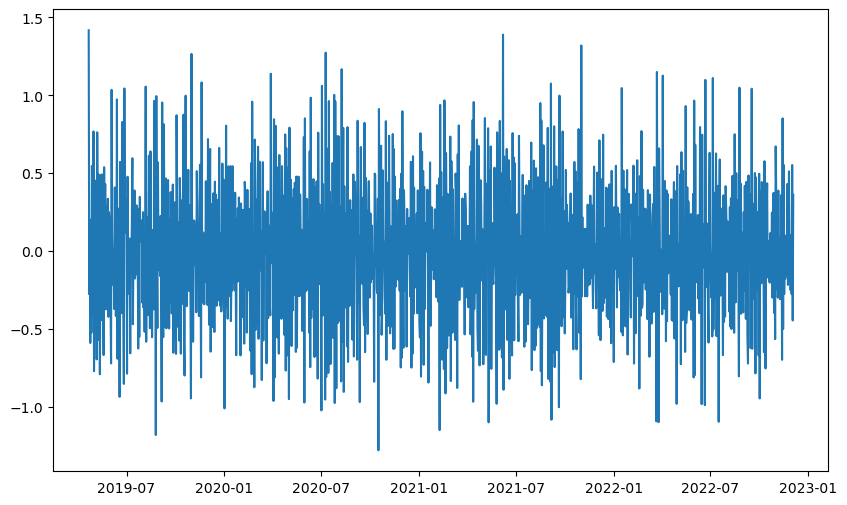

In [100]:
datasetLogDiffShifting = indexedDataset_logscale - indexedDataset_logscale.shift()
plt.plot(c)

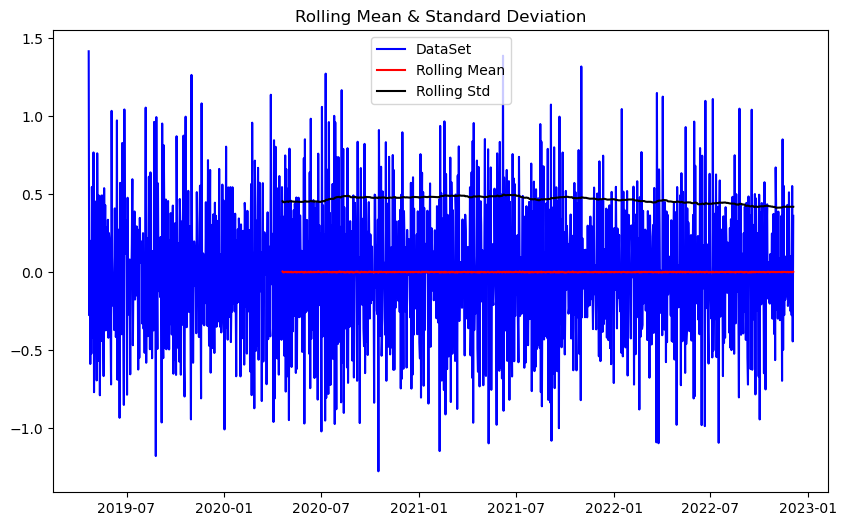

Results of Dickey Fuller Test
Test Statistic                -1.787183
P-Value                        0.386843
#Lags Used                    11.000000
No. Of Observations Used    1313.000000
dtype: float64

Critical Values: 
1% : -3.435340198430096
Null Hypothesis Accepted. Time Series is not Stationary
5% : -2.863743768394356
Null Hypothesis Accepted. Time Series is not Stationary
10% : -2.567943297315671
Null Hypothesis Accepted. Time Series is not Stationary


In [101]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

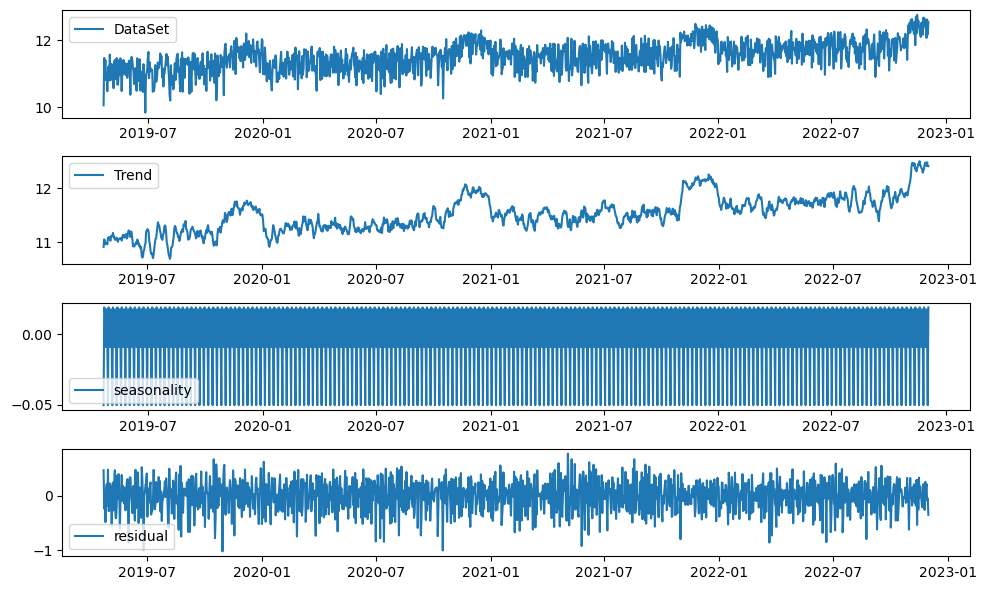

In [105]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logscale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logscale, label='DataSet')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='residual')
plt.legend(loc='best')
plt.tight_layout()


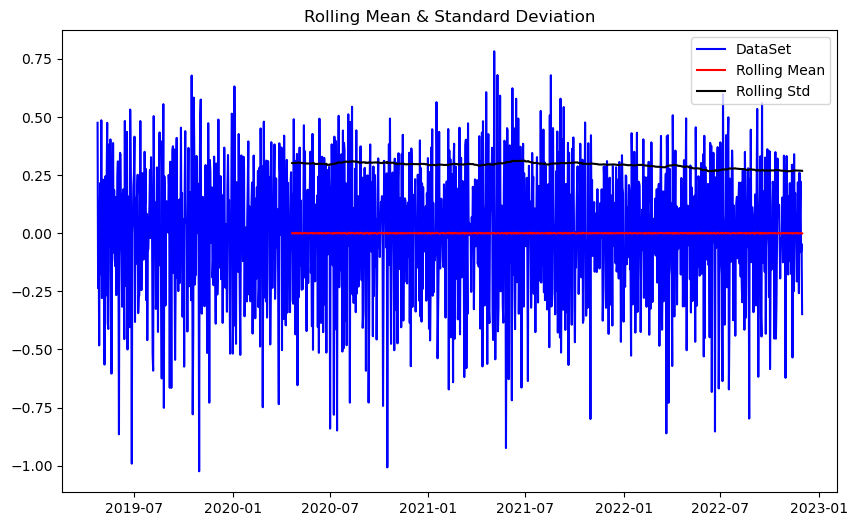

Results of Dickey Fuller Test
Test Statistic                -1.787183
P-Value                        0.386843
#Lags Used                    11.000000
No. Of Observations Used    1313.000000
dtype: float64

Critical Values: 
1% : -3.435340198430096
Null Hypothesis Accepted. Time Series is not Stationary
5% : -2.863743768394356
Null Hypothesis Accepted. Time Series is not Stationary
10% : -2.567943297315671
Null Hypothesis Accepted. Time Series is not Stationary


In [106]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

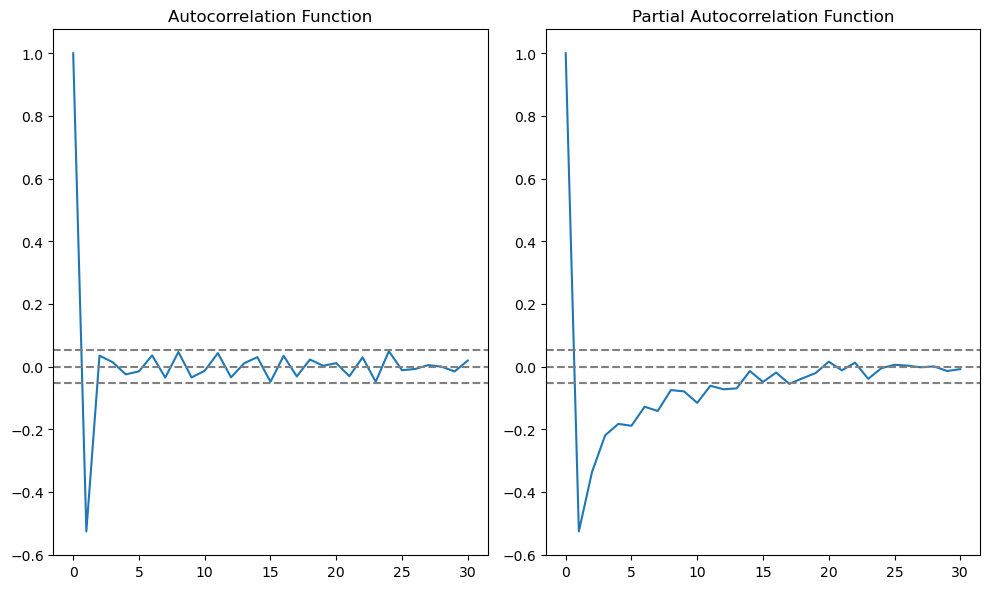

In [107]:
#(ACF - Autocorrelation Function) and (PACF - Partial Autocorrelation Function plots
"""
ACF:- Correlation between time series with a lagged version of itself.Say,we have a time series, and basically it makes 
multiple “copies” (as in “copy and paste”) of it, understanding that each copy is going to be offset by one entry from 
the prior copy 

PACF:- The correlation between observations at two time spots given that we consider both observations are correlated 
to observations at other time spots.
"""

from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(datasetLogDiffShifting, nlags = 30)
lag_pacf = pacf(datasetLogDiffShifting, nlags = 30, method='ols')

#plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Plotting AR Model


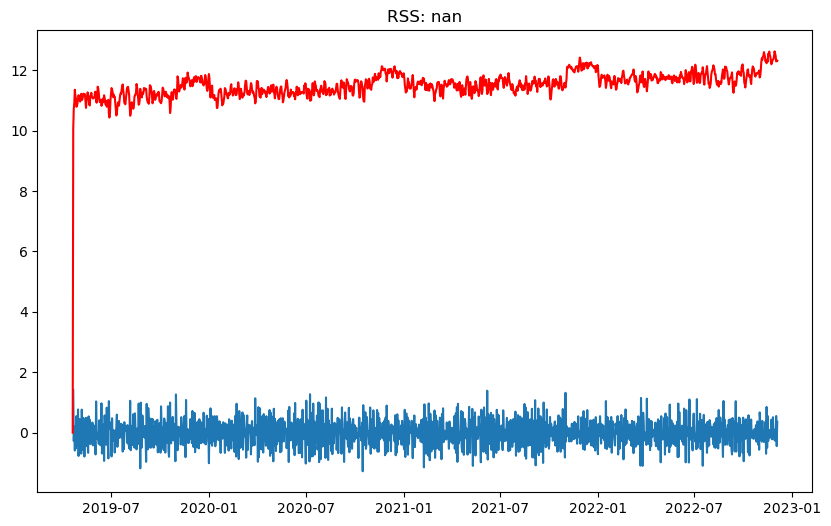

In [171]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as smapi

#Auto Regression Model
AR_model = ARIMA(indexedDataset_logscale, order=(2,1,0))
AR_results = AR_model.fit()
plt.plot(datasetLogDiffShifting)
plt.plot(AR_results.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((AR_results.fittedvalues - datasetLogDiffShifting["Sales Amount"])**2))
print('Plotting AR Model')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Plotting AR Model


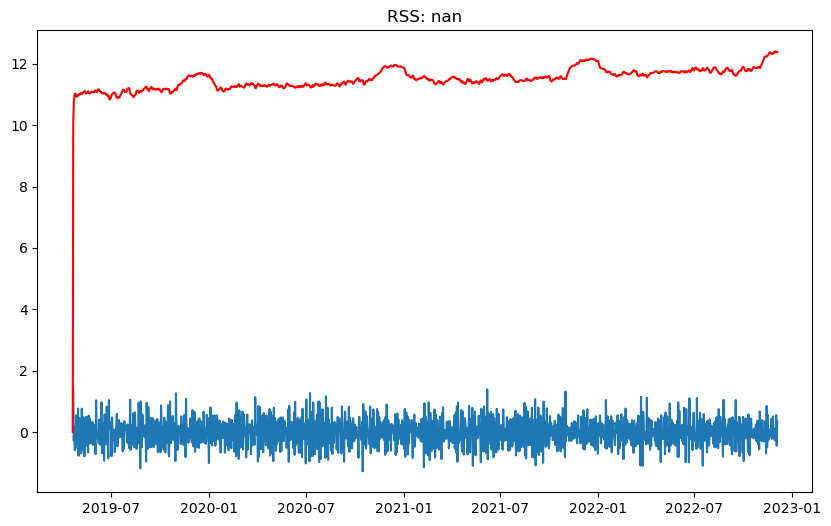

In [172]:
# Moving Average
model = ARIMA(indexedDataset_logscale,order=(0,1,2)) # p , d , Q
results_MA = model.fit()

plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
# Calculating RSS (Residual sum of squares)
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting["Sales Amount"])**2)) 
print('Plotting AR Model')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Sales Amount   No. Observations:                 1325
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -547.394
Date:                Sun, 22 Jan 2023   AIC                           1100.789
Time:                        15:38:54   BIC                           1116.354
Sample:                    04-20-2019   HQIC                          1106.624
                         - 12-04-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7087      0.027    -26.617      0.000      -0.761      -0.657
ar.L2         -0.3390      0.026    -13.285      0.000      -0.389      -0.289
sigma2         0.1338      0.005     25.196      0.0

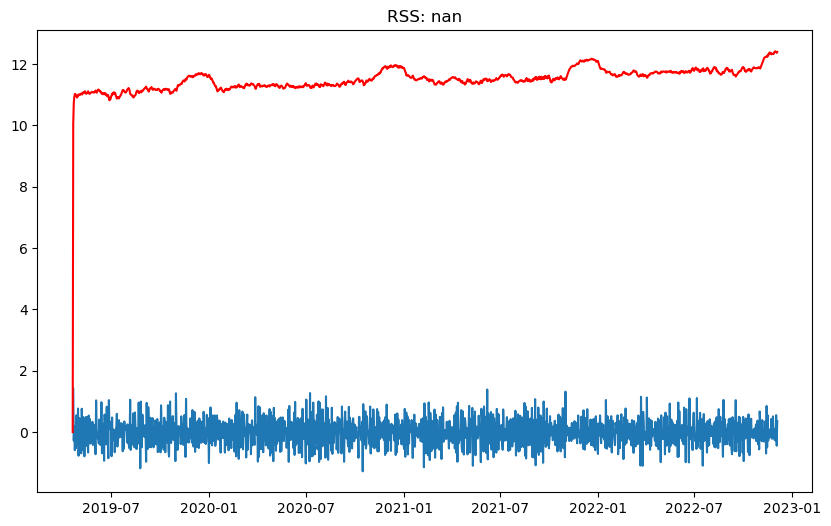

In [161]:
model = ARIMA(indexedDataset_logscale,order=(2,1,2)) # p = 2, d =1, Q = 2
results_ARIMA = model.fit()
print(results_MA.summary())
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
# Calculating RSS (Residual sum of squares)
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting["Sales Amount"])**2)) 
print('Plotting ARIMA Model')

In [162]:
prediction_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy = True)
print(prediction_ARIMA_diff.head())

InvoiceDate
2019-04-20     0.000000
2019-04-21    10.057494
2019-04-22    10.723489
2019-04-23    10.923268
2019-04-24    11.019716
dtype: float64


In [163]:
prediction_ARIMA_diff_cumsum = prediction_ARIMA_diff.cumsum()
print(prediction_ARIMA_diff_cumsum.head())

InvoiceDate
2019-04-20     0.000000
2019-04-21    10.057494
2019-04-22    20.780983
2019-04-23    31.704251
2019-04-24    42.723967
dtype: float64


In [176]:
prediction_ARIMA_log = pd.Series(indexedDataset_logscale['Sales Amount'], index=indexedDataset_logscale.index)
prediction_ARIMA_log = prediction_ARIMA_log.add(prediction_ARIMA_diff_cumsum,fill_value=0)
prediction_ARIMA_log.head()

InvoiceDate
2019-04-20    10.057495
2019-04-21    21.532240
2019-04-22    31.979540
2019-04-23    43.104948
2019-04-24    53.535713
dtype: float64

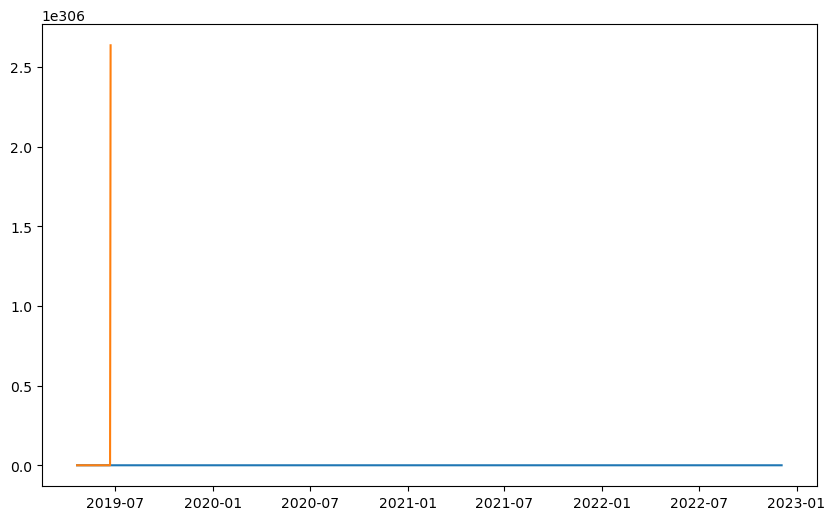

In [177]:
predictions_ARIMA = np.exp(prediction_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

In [178]:
indexedDataset_logscale

,Sales Amount
InvoiceDate,
2019-04-20,10.057495
2019-04-21,11.474746
2019-04-22,11.198557
2019-04-23,11.400697
2019-04-24,10.811746
...,...
2022-11-30,12.349866
2022-12-01,12.074049
2022-12-02,12.626791


In [195]:
#results_ARIMA.plot_predict(1,1690)
results_ARIMA.forecast(steps=1690)


2022-12-05    12.366182
2022-12-06    12.402971
2022-12-07    12.374135
2022-12-08    12.401622
2022-12-09    12.375125
                ...    
2027-07-17    12.388134
2027-07-18    12.388134
2027-07-19    12.388134
2027-07-20    12.388134
2027-07-21    12.388134
Freq: D, Name: predicted_mean, Length: 1690, dtype: float64